# Forward Neural Network Training

In [53]:
%matplotlib inline
DATA_DIR = './data/sales_predict_train.csv'

lr = 5e-1
n_epochs = 8000  # number of epochs

INPUT_DIM = 3  # dimension of feature
OUTPUT_DIM = 1  # dimension of target
HIDDEN_NUM = 5  # size of hidden layer

maxValue = 3000  # 假设最大利润不超过3000
minValue = 0  # 最低利润为0

## 0. Data Preparation

In [54]:
import numpy as np
raw_data = [2056, 2395, 2600, 2298, 1634, 1600, 1873, 1478, 1900]

# 线性归一化处理
raw_data = (np.array(raw_data) - minValue) / (maxValue - minValue)
features = np.array([raw_data[i:i+3] for i in range(raw_data.shape[0] - 3)])
predict = np.array([raw_data[i] for i in range(3, raw_data.shape[0])])
data = np.hstack((features.reshape(-1, 3), predict.reshape(-1, 1)))

np.savetxt(DATA_DIR, data, delimiter=',', newline='\n', fmt='%.3f')

## 1. Model Initialization

In [55]:
from model import multiple_layer_perceptron as mlp
from model import nnlayers
import numpy as np

net = mlp.get_model(INPUT_DIM, OUTPUT_DIM, HIDDEN_NUM, act_layer=nnlayers.Tanh()
                    , output_layer=nnlayers.Sigmoid()
                   )  # 3-layer forward neural network

def squared_loss(y_hat, y):
    """ MSE """
    return (y.reshape(y_hat.shape) - y_hat) ** 2 / 2, y.reshape(y_hat.shape) - y_hat

## 2. Model Training

In [56]:
from data_util.DataLoader import DataSet, DataLoader
from data_util.Animator import MyAnimator
from train import train_per_epoch, eval_per_epoch
import matplotlib.pyplot as plt

print("start loading training data ...")
train_dataset = DataSet(DATA_DIR, split='train')
train_dataloader = DataLoader(train_dataset, batch_size=3, shuffle=False)
print("The number of training data is: %d." % len(train_dataset))

start loading training data ...
The number of training data is: 6.


### (1) Mini-Batch Backpropagation

Training mean loss: 0.000000


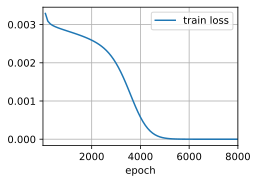

In [57]:
animator = MyAnimator(xlabel='epoch', xlim=[1, n_epochs],
                        legend=['train loss', 'test loss'])

for epoch in range(n_epochs):
    train_metrics = train_per_epoch(net, train_dataloader, squared_loss, lr)
    if epoch % 100 == 99:
        animator.add(epoch + 1, train_metrics)

print('Training mean loss: %f' % train_metrics)
# animator.savefig('../fig/NN/sales_pred_training_loss.pdf')

### (2) Predict

In [58]:
for i, (features, target) in enumerate(train_dataloader):
    pred = net(features)
    print(pred * (maxValue - minValue) + minValue)

input_10 = np.array([0.624, 0.493, 0.633])
predict_10 = net(input_10)[0,0]

input_11 = np.array([0.493, 0.633, predict_10])
predict_11 = net(input_11)[0,0]

input_12 = np.array([0.633, predict_10, predict_11])
predict_12 = net(input_12)[0,0]

print("Predict results: [10]: {:.2f}\t[11]: {:.2f}\t[12]: {:.2f}".format(
    predict_10 * (maxValue - minValue) + minValue, 
    predict_11 * (maxValue - minValue) + minValue, 
    predict_12 * (maxValue - minValue) + minValue))

[[2297.95708544]
 [1635.01044599]
 [1599.06810731]]
[[1871.95258878]
 [1479.09119833]
 [1898.98168057]]
Predict results: [10]: 1461.50	[11]: 1899.56	[12]: 1460.91
